<a href="https://colab.research.google.com/github/iLonow/sii/blob/main/%D0%96%D0%B0%D1%80%D0%B8%D0%BD%D0%BE%D0%B2_%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80_%D0%A0%D0%A26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1
Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными

In [ ]:
#Вариант 10

def qZ(x,y):
    return (x - 3 * y) / (2*(x ** 2) + 2 * (y ** 2) + 1)

#Оценка функции полезности F потомков: функция qZ оценивает функцию полезности Z потомков на основе значений X и Y.
def qSumZ(Z):
    return sum(Z)

#Кроссовер: функция exchangeScheme осуществляет кроссовер между родительскими хромосомами X и Y.
def exchangeScheme(oldX,oldY, sortedId):
    X=[0 for i in range(4)]
    Y=[0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X,Y

#Селекция: функция sorting сортирует потомков в порядке возрастания значений Z.
def sorting(Z):
    sortedId=sorted(range(len(Z)), key=lambda k:Z[k])

    return sortedId

def evostep(X,Y,Z):
    _, minId = min((value,id) for (id,value) in enumerate(Z))

    X=X[:]
    Y=Y[:]
    Z=Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X,Y,Z

def evosteps(X,Y, stepsnum=4):
    results=[]

    for i in range(4):
        arrZ=[qZ(x,Y[i]) for i, x in enumerate(X)]
        X,Y,Z=evostep(X,Y,arrZ)
        X,Y=exchangeScheme(X,Y,sorting(Z))

        results.append([X,Y,qSumZ(arrZ),arrZ])

    return X,Y,results

X = [-1,0,2,3]
Y = [0,1,-2,2]

results=evosteps(X,Y)
qualityArrZ = []

for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]
    print(f'max_{i+1}_step: {qualityArrZ[i]}')

print('max Z:', max(qualityArrZ), sep='\t')

max_1_step: -0.3333333333333333
max_2_step: -1.0
max_3_step: 0.47058823529411764
max_4_step: -0.1111111111111111
max Z:	0.47058823529411764


Задание 2
Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.

Лучший выбранный маршрут: [1, 2, 4, 3, 6, 5, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [165, 150, 165, 180, 154]


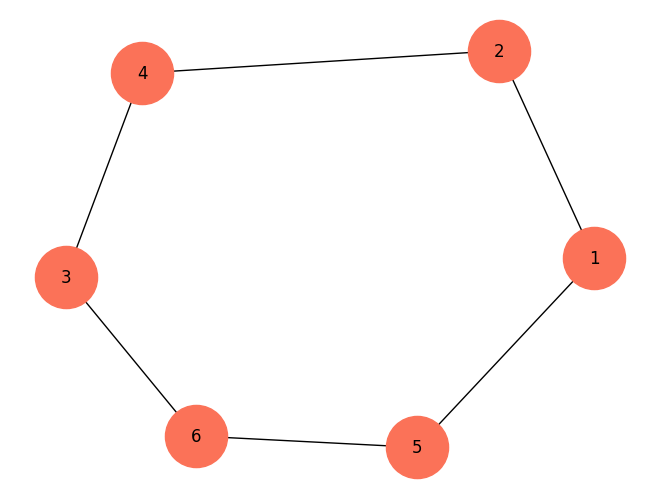

In [ ]:
#Вариант 2

import networkx as nx
from math import e

distances = [(1, 2, 25),
             (1, 3, 41),
             (1, 4, 38),
             (1, 5, 27),
             (1, 6, 20),
             (2, 3, 21),
             (2, 4, 34),
             (2, 5, 39),
             (2, 6, 17),
             (3, 4, 24),
             (3, 5, 40),
             (3, 6, 22),
             (4, 5, 21),
             (4, 6, 21),
             (5, 6, 22)]

V = [1, 3, 5, 4, 6, 2, 1]
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (2, 4)]
P = [41, 60, 85, 60]

T=100

def probability(delta, T):
    return 100 * e ** (-delta / T)
def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT

#graph = nx.Graph()
#graph.add_weighted_edges_from(distances)
#nx.draw_kamada_kawai(graph,node_color='#fb7258',node_size=2000,with_labels=True)

def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

#Мутация, которая меняет местами два элемента в массиве маршрута.
def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

#Мутация, которая меняет местами два элемента в массиве маршрута.
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

#Оценка функции полезности F потомков : сравнивается длина текущего маршрута с длиной маршрута,
#полученного в результате мутации, и определяется вероятность принятия нового маршрута.
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)
    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute)

Задание *
На решенном уже примере поэкспериментируйте с показателем S,
проанализируйте результаты.

Лучший выбранный маршрут: [1, 2, 4, 3, 6, 5, 1]
Длина лучшего выбранного маршрута: 154
Длины всех рассмотренных маршрутов: [165, 150, 165, 180, 154]


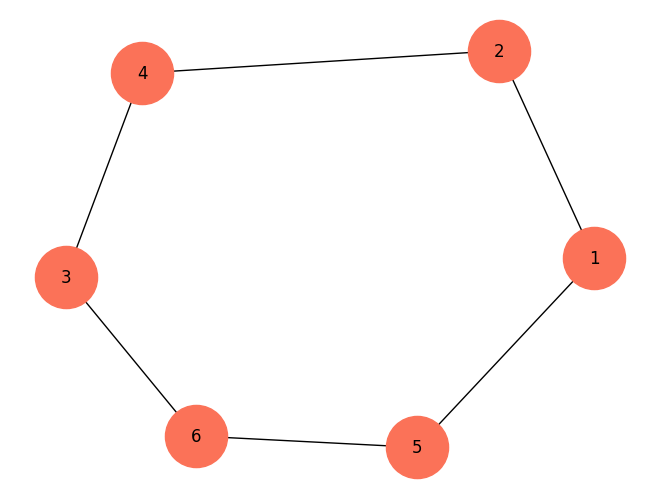

In [ ]:
import networkx as nx
from math import e

distances = [(1, 2, 25),
             (1, 3, 41),
             (1, 4, 38),
             (1, 5, 27),
             (1, 6, 20),
             (2, 3, 21),
             (2, 4, 34),
             (2, 5, 39),
             (2, 6, 17),
             (3, 4, 24),
             (3, 5, 40),
             (3, 6, 22),
             (4, 5, 21),
             (4, 6, 21),
             (5, 6, 22)]

V = [1, 3, 5, 4, 6, 2, 1]
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (2, 4)]
P = [41, 60, 85, 60]

T=100

def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = 0.75 * prevT
    return nextT

#graph = nx.Graph()
#graph.add_weighted_edges_from(distances)
#nx.draw_kamada_kawai(graph,node_color='#fb7258',node_size=2000,with_labels=True)

def edgeLength(i, j, distances, roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                    for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

    return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName=True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength
        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
        T = reductTemp(T)
    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size=2000, with_labels=True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)
